<font size="+3.8">Foxf2 Expression per Cell Type</font>  
<font size="+1.5"></font>  

sfrerich

Aim: Combine and plot Foxf2 expression from processed scRNA-seq studies. Processing see separate scripts.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
from datetime import date
from matplotlib.pyplot import rc_context
import seaborn as sns

In [2]:
sc.settings.verbosity = 3

In [3]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win
#main_dir='/Volumes/BD-Dichgans/SF'

# Foxf2

In [4]:
gene="Foxf2"

## Load data

In [5]:
path = main_dir+'//P6_Foxf2_per_celltype//Foxf2_summarized' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230228_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230228_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230228_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230301_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230302_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230302_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF//P6_Foxf2_per_celltype//Foxf2_summarized\\20230310_TabulaMuris2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\

In [6]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [7]:
all

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,ECs,0.291276,0.107273,FOXF2,Winkler2022,Human,4950
1,Fibroblasts,0.403376,0.153991,FOXF2,Winkler2022,Human,3721
2,Fibromyocytes,0.033961,0.021365,FOXF2,Winkler2022,Human,4353
3,Pericytes,1.000000,0.355623,FOXF2,Winkler2022,Human,329
4,SMCs,0.000000,0.010474,FOXF2,Winkler2022,Human,41150
...,...,...,...,...,...,...,...
77,ECs,1.000000,0.752618,Foxf2,Vanlandewijck2018,Mouse,1528
78,Fibroblasts,0.293552,0.476744,Foxf2,Vanlandewijck2018,Mouse,86
79,Oligos,0.000000,0.025806,Foxf2,Vanlandewijck2018,Mouse,155
80,Pericytes,0.853845,0.585478,Foxf2,Vanlandewijck2018,Mouse,1088


In [8]:
all.gene.unique()

array(['FOXF2', 'Foxf2'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [9]:
all.clusters.value_counts()

SMCs                               9
Pericytes                          8
Astrocytes                         8
Oligos                             8
Neurons                            7
OPCs                               6
Fibroblasts                        6
Microglia/Macrophages              5
Endothelial cells                  5
ECs                                4
Ependymal cells                    4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
Leptomeningeal cells               1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Name: clusters, dtype: int64

In [10]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0,0


In [11]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [12]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [13]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [14]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [15]:
all = all.replace("Microglia","Microglia/Mφ")

In [16]:
all = all.replace("Macrophages","Microglia/Mφ")

In [17]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [18]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [19]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [20]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [21]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [22]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [23]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [24]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [25]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
11,Neuroblasts/NSCs,0.000000,0.000000,Foxf2,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.001688,0.000499,Foxf2,Saunders2018,Mouse,4008


### Rename ECs

In [26]:
# rename ECs to Endothelial cells

In [27]:
all2 = all

In [28]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [29]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [30]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [31]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [32]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [33]:
all2 = all2.sort_values("clusters")

### Rename studies

In [34]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [35]:
all2 = all2.replace("Heindl2022","Own data")

In [36]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [37]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [38]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [39]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [40]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [41]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [42]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [43]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [44]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [45]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


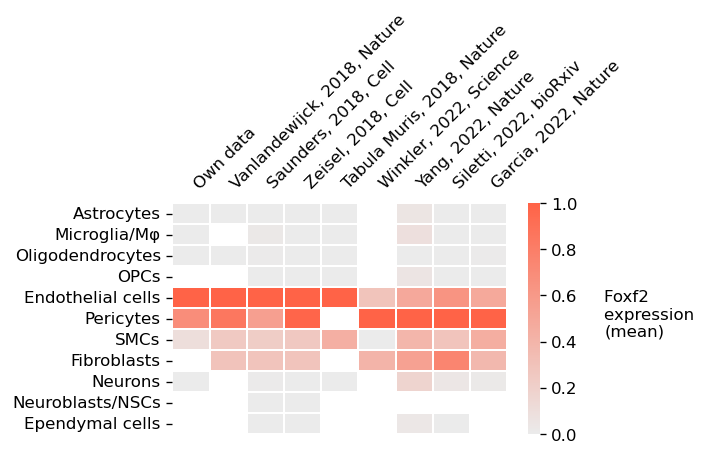

In [46]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [47]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [48]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [49]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [50]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

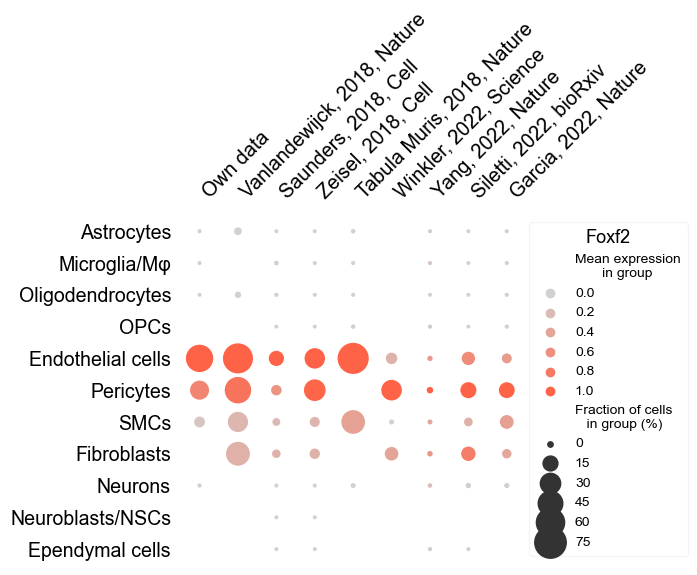

In [51]:
plt.show()

In [52]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.png', dpi=500)

In [53]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_a.svg', dpi=500)

In [54]:
# format legend as in sc.pl.dotplot()?

In [55]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(0, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(10,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

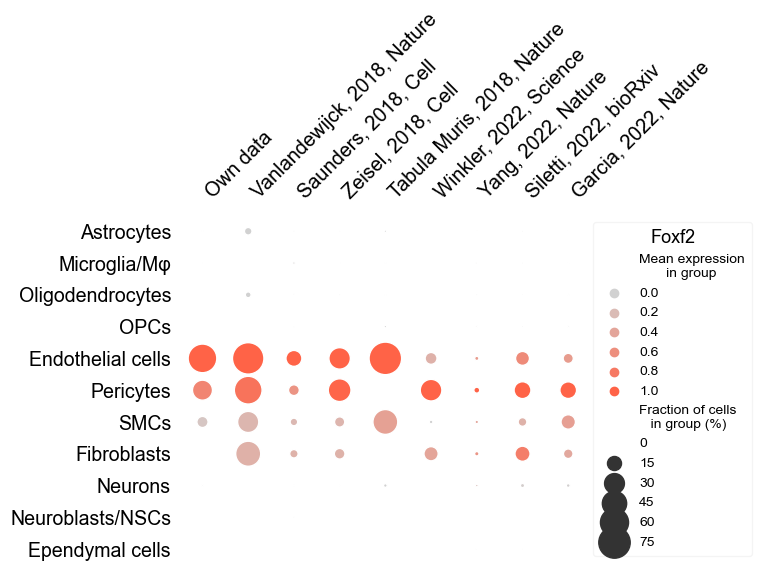

In [56]:
plt.show()

Plot shows no dot if fraction of cells is 0

In [57]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.png', dpi=500)

In [58]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_b.svg', dpi=500)

## Cell Numbers

In [59]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature",Total
clusters,,,,,,,,,,
Astrocytes,783,250,51571,19755,433,0,9943,163066,11954,257755
Microglia/Mφ,1360,0,6129,6744,4365,0,1142,91838,8164,119742
Oligodendrocytes,54,155,113209,26243,1186,0,8528,494966,29428,673769
OPCs,0,0,12252,733,202,0,1509,105734,5844,126274
Endothelial cells,338,1528,40105,2334,625,4950,24982,5165,6561,86588
Pericytes,92,1088,5342,4156,0,329,17561,3693,4922,37183
SMCs,95,297,7667,1575,132,41150,4669,1074,1039,57698
Fibroblasts,0,86,3993,1491,0,3721,2032,9156,4147,24626
Neurons,753,0,399331,63512,196,0,933,2455885,23968,2944578


In [60]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells.csv',sep=";")

In [61]:
del all
del all2
del all4
del all5

## Include AV zonation

### Load data

In [62]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230228_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230302_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\20230310_Vanlandewijck2018_incl_zonation.csv']

In [63]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [64]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [65]:
all.clusters2.value_counts()

Fibroblasts              4
Pericytes                4
SMCs                     4
ECs_Arterial             3
Astrocytes               3
ECs_Capillary            3
Oligos                   3
ECs_Venous               2
vECs                     2
Neurons                  2
OPCs                     2
Microglia                1
capECs                   1
aECs                     1
Microglia/Macrophages    1
T cells                  1
Ependymal cells          1
Fibromyocytes            1
ECs_non_AV               1
Name: clusters2, dtype: int64

In [66]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters2)

clusters2,Astrocytes,ECs_Arterial,ECs_Capillary,ECs_Venous,ECs_non_AV,Ependymal cells,Fibroblasts,Fibromyocytes,Microglia,Microglia/Macrophages,Neurons,OPCs,Oligos,Pericytes,SMCs,T cells,aECs,capECs,vECs
source,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,0,0,0,0,1,0,1,0,1,1,1,1,1,0,1,1,1
Vanlandewijck2018,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,1
Winkler2022,0,1,1,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
Yang2022,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0,0,0


### Format

#### Remove celltypes

In [67]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [68]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [69]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [70]:
all = all.replace("ECs_Arterial","aECs")

In [71]:
all = all.replace("ECs_Capillary","capECs")

In [72]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [73]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [74]:
all = all.replace("Microglia","Microglia/Mφ")

In [75]:
all = all.replace("Macrophages","Microglia/Mφ")

In [76]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [77]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [78]:
all2 = all

In [79]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [80]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])

In [81]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [82]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [83]:
all2 = all2.sort_values("clusters2")

#### Rename studies

In [84]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [85]:
all2 = all2.replace("Heindl2022","Own data")

In [86]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [87]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [88]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [89]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [90]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [91]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [92]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [93]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [94]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [95]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


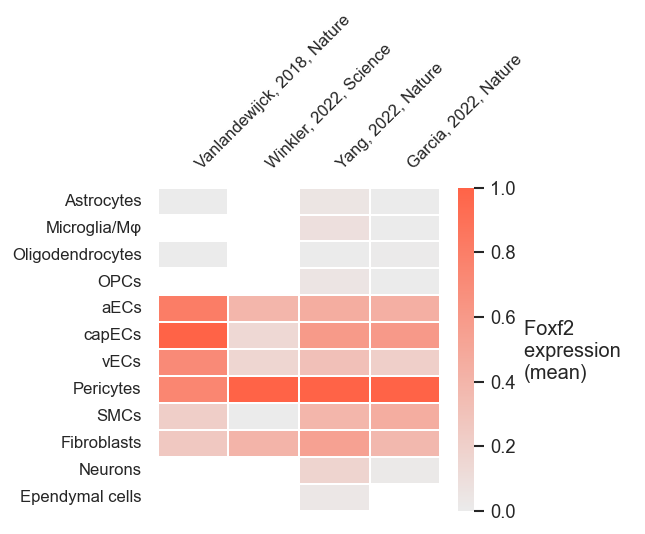

In [96]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [97]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [98]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [99]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [100]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

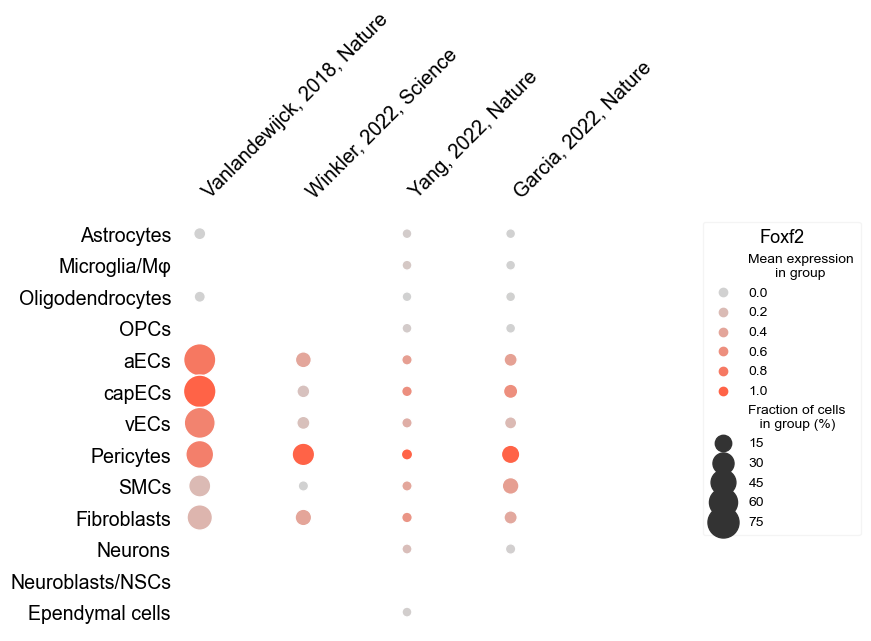

In [101]:
plt.show()

In [102]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.png', dpi=500)

In [103]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_incl_AV_zonation.svg', dpi=500)

## Cell Numbers

In [104]:
# Format table
all5=all2.set_index(['clusters','source'])['cell_number'].unstack().reset_index() # unmelt
# change row order to represent groupings
all5.index = all5.clusters
all5=all5.reindex(list(all2.clusters.unique()))
all5=all5.drop("clusters",axis=1)
#all4.sort_values("clusters")
all5 = all5.fillna(0)
all5 = all5.astype(int)
# add marginal frequencies
all5.loc["Total"] = all5.sum(skipna=True)
all5['Total'] = all5[list(all5.columns)].sum(axis=1)
all5

source,"Vanlandewijck, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Garcia, 2022, Nature",Total
clusters,,,,,
Astrocytes,250,0,9943,11954,22147
Microglia/Mφ,0,0,1142,8164,9306
Oligodendrocytes,155,0,8528,29428,38111
OPCs,0,0,1509,5844,7353
aECs,397,2886,4486,826,8595
capECs,405,165,13357,4160,18087
vECs,298,1899,7139,1575,10911
Pericytes,1088,329,17561,4932,23910
SMCs,297,41150,4669,1029,47145


In [105]:
all5.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\'+date.today().strftime("%Y%m%d")+'_number_of_cells_incl_AV_zonation.csv',sep=";")

In [106]:
del all
del all2
del all4
del all5
del all_files

# Other genes: Tek

In [107]:
gene = "Tek"

## Load data

In [108]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Tek_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_TEK_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Tek_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TEK_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_TEK_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230310_Tek_Hein

In [109]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [110]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [111]:
all.gene.unique()

array(['Tek', 'TEK'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [112]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Pericytes                          8
Oligos                             8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Endothelial cells                  5
Microglia/Macrophages              5
Ependymal cells                    4
ECs                                4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Leptomeningeal cells               1
Name: clusters, dtype: int64

In [113]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0,0


In [114]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [115]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [116]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [117]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [118]:
all = all.replace("Microglia","Microglia/Mφ")

In [119]:
all = all.replace("Macrophages","Microglia/Mφ")

In [120]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [121]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis']

### SMCs/Pericytes

In [122]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [123]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [124]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [125]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [126]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [127]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [128]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.000221,0.000549,Tek,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.000000,0.000499,Tek,Saunders2018,Mouse,4008


### Rename ECs

In [129]:
# rename ECs to Endothelial cells

In [130]:
all2 = all

In [131]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [132]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [133]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [134]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [135]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [136]:
all2 = all2.sort_values("clusters")

### Rename studies

In [137]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [138]:
all2 = all2.replace("Heindl2022","Own data")

In [139]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [140]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [141]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [142]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [143]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [144]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [145]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [146]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [147]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [148]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


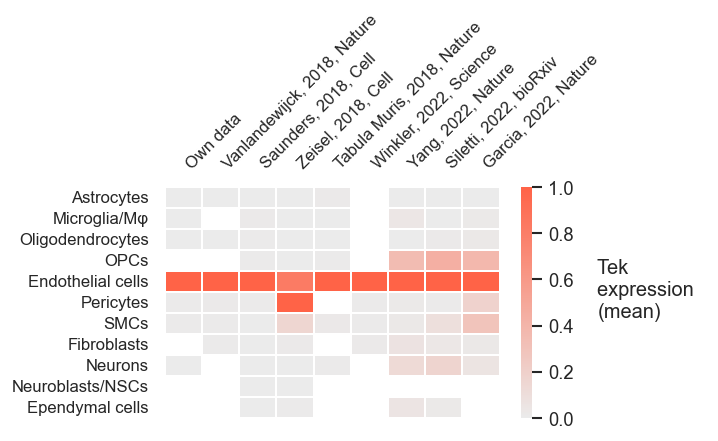

In [149]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [150]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [151]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [152]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [153]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

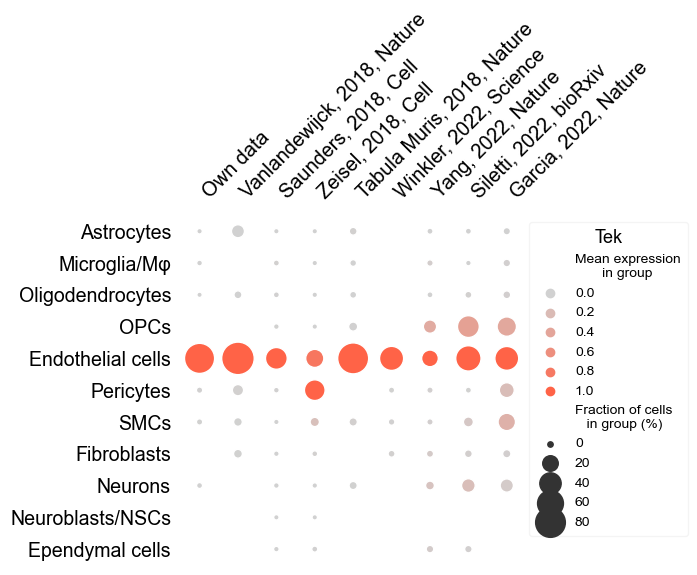

In [154]:
plt.show()

In [155]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [156]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

In [157]:
del all
del all2
del all4

## Include AV zonation

### Load data

In [158]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_TEK_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_TEK_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Tek_Vanlandewijck2018_incl_zonation.csv']

In [159]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [160]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [161]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [162]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [163]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [164]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [165]:
all = all.replace("ECs_Arterial","aECs")

In [166]:
all = all.replace("ECs_Capillary","capECs")

In [167]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [168]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [169]:
all = all.replace("Microglia","Microglia/Mφ")

In [170]:
all = all.replace("Macrophages","Microglia/Mφ")

In [171]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [172]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

#### Set order of axes

In [173]:
all2 = all

In [174]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [175]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [176]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [177]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [178]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [179]:
all2 = all2.replace("Heindl2022","Own data")

In [180]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [181]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [182]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [183]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [184]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [185]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [186]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [187]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [188]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [189]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


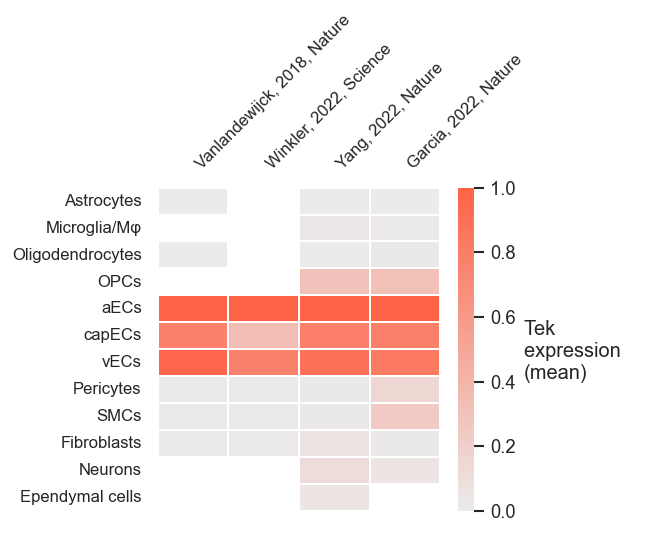

In [190]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [191]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [192]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [193]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [194]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

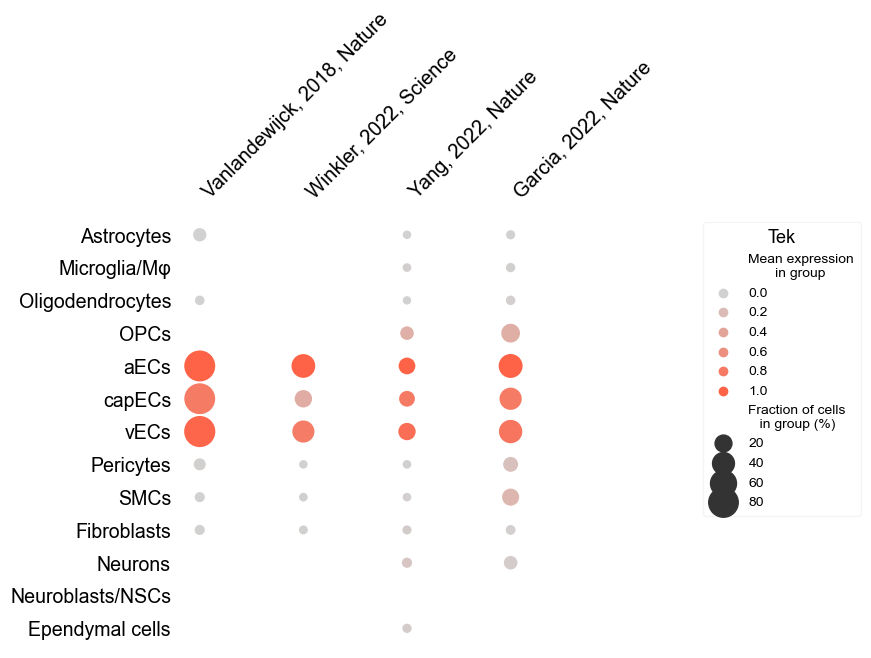

In [195]:
plt.show()

In [196]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [197]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [198]:
del all
del all2
del all4
del all_files

# Other genes: Foxo1

In [199]:
gene = "Foxo1"

## Load data

In [200]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Foxo1_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_FOXO1_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Foxo1_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_FOXO1_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230

In [201]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [202]:
all.source.unique()

array(['Winkler2022', 'Zeisel2018', 'Yang2022', 'Siletti2022',
       'Saunders2018', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [203]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [204]:
all.clusters.value_counts()

SMCs                               9
Pericytes                          8
Astrocytes                         8
Oligos                             8
Neurons                            7
OPCs                               6
Fibroblasts                        6
Microglia/Macrophages              5
Endothelial cells                  5
ECs                                4
Ependymal cells                    4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
Leptomeningeal cells               1
T cells                            1
Choroid plexus epithelial cells    1
Macrophages                        1
Neurogenesis                       1
Microglia                          1
Immune_Other                       1
Name: clusters, dtype: int64

In [205]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0,0


In [206]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [207]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [208]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [209]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Macrophages',
 'Neurogenesis',
 'Microglia']

In [210]:
all = all.replace("Microglia","Microglia/Mφ")

In [211]:
all = all.replace("Macrophages","Microglia/Mφ")

In [212]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [213]:
all.clusters.unique().tolist()

['ECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [214]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [215]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [216]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [217]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [218]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [219]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [220]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
11,Neuroblasts/NSCs,0.032349,0.039517,Foxo1,Zeisel2018,Mouse,5466
44,Neuroblasts/NSCs,0.055644,0.027944,Foxo1,Saunders2018,Mouse,4008


### Rename ECs

In [221]:
# rename ECs to Endothelial cells

In [222]:
all2 = all

In [223]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [224]:
all2.clusters.unique().tolist()

['Endothelial cells',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'OPCs']

In [225]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [226]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [227]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [228]:
all2 = all2.sort_values("clusters")

### Rename studies

In [229]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [230]:
all2 = all2.replace("Heindl2022","Own data")

In [231]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [232]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [233]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [234]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [235]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [236]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [237]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [238]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [239]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [240]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


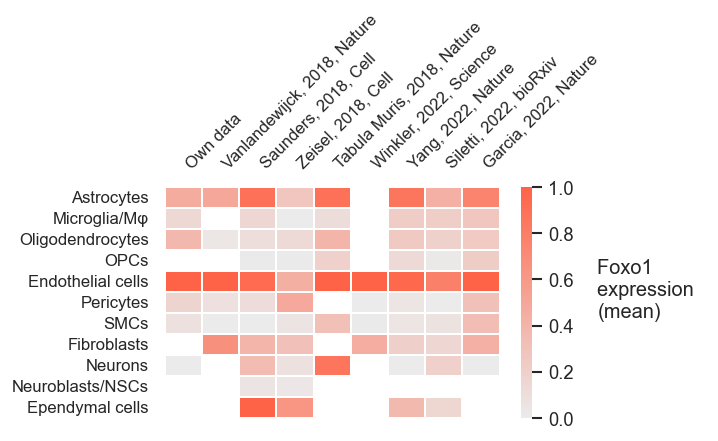

In [241]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [242]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [243]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [244]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [245]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

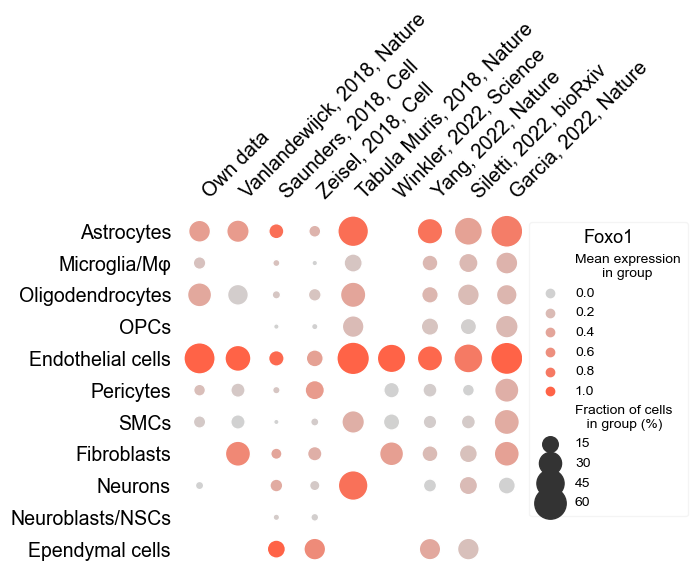

In [246]:
plt.show()

In [247]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [248]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [249]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_FOXO1_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_FOXO1_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Foxo1_Vanlandewijck2018_incl_zonation.csv']

In [250]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [251]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [252]:
all.gene.unique()

array(['FOXO1', 'Foxo1'], dtype=object)

In [253]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [254]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [255]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [256]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [257]:
all = all.replace("ECs_Arterial","aECs")

In [258]:
all = all.replace("ECs_Capillary","capECs")

In [259]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [260]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [261]:
all = all.replace("Microglia","Microglia/Mφ")

In [262]:
all = all.replace("Macrophages","Microglia/Mφ")

In [263]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [264]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [265]:
all2 = all

#### Set order of axes

In [266]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [267]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [268]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [269]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [270]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [271]:
all2 = all2.replace("Heindl2022","Own data")

In [272]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [273]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [274]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [275]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [276]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [277]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [278]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [279]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [280]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [281]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


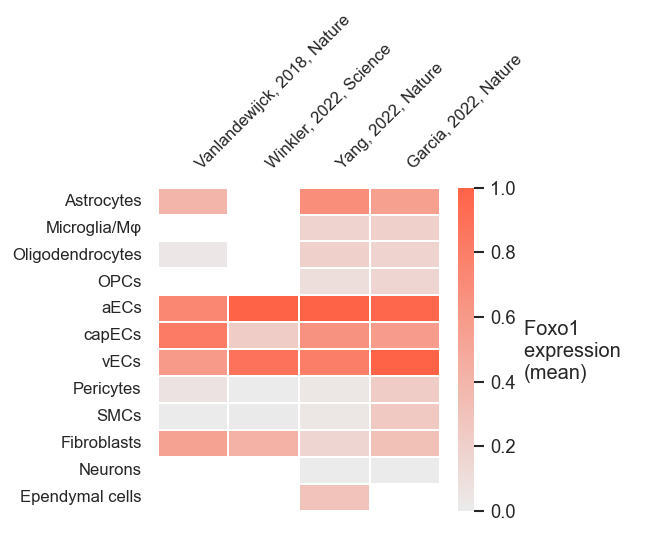

In [282]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [283]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [284]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [285]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [286]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

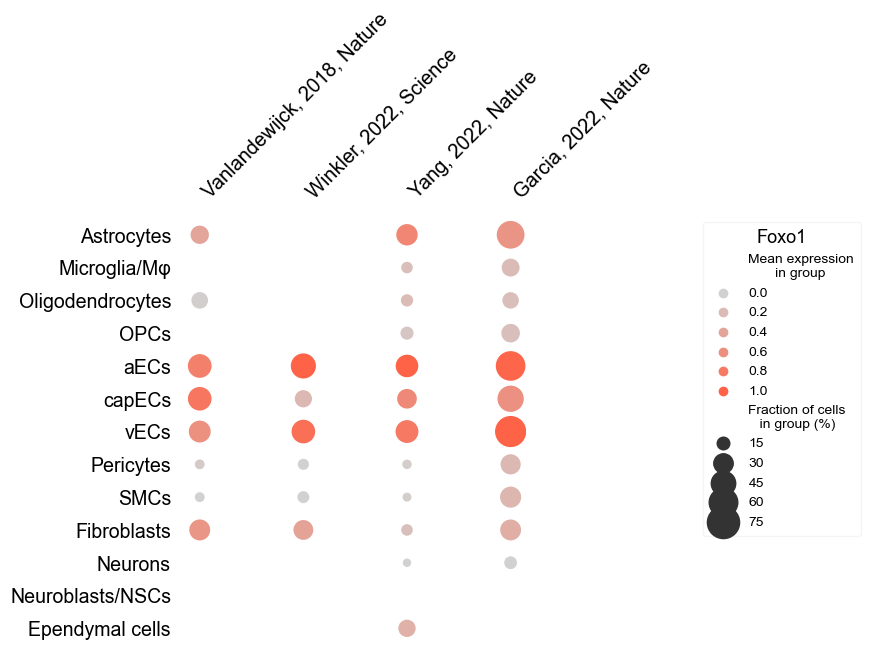

In [287]:
plt.show()

In [288]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [289]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

In [290]:
del all
del all2
del all4
del all_files

# Other genes: Nos3

In [185]:
gene="Nos3"

## Load data

In [186]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_Nos3_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230228_NOS3_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230301_Nos3_Saunders2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_NOS3_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230302_NOS3_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230310_No

In [187]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [188]:
all.source.unique()

array(['Zeisel2018', 'Winkler2022', 'Yang2022', 'Saunders2018',
       'Siletti2022', 'Garcia2022', 'Heindl2022', 'Vanlandewijck2018',
       'TabulaMuris2018'], dtype=object)

In [189]:
all.gene.unique()

array(['Nos3', 'NOS3'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [190]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Pericytes                          8
Oligos                             8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Endothelial cells                  5
Microglia/Macrophages              5
Ependymal cells                    4
ECs                                4
Unknown                            2
Neuroblasts                        1
Olfactory ensheathing cells        1
Fibromyocytes                      1
T cells                            1
Neurogenesis                       1
Choroid plexus epithelial cells    1
Macrophages                        1
Microglia                          1
Immune_Other                       1
Leptomeningeal cells               1
Name: clusters, dtype: int64

In [191]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0,0


In [192]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [193]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [194]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [195]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Macrophages',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis',
 'Macrophages',
 'Microglia']

In [196]:
all = all.replace("Microglia","Microglia/Mφ")

In [197]:
all = all.replace("Macrophages","Microglia/Mφ")

In [198]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [199]:
all.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Leptomeningeal cells',
 'ECs',
 'Fibroblasts',
 'Neurogenesis']

### SMCs/Pericytes

In [200]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [201]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [202]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [203]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [204]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [205]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [206]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
6,Neuroblasts/NSCs,0.039580,0.010062,Nos3,Zeisel2018,Mouse,5466
33,Neuroblasts/NSCs,0.017165,0.003743,Nos3,Saunders2018,Mouse,4008


### Rename ECs

In [207]:
# rename ECs to Endothelial cells

In [208]:
all2 = all

In [209]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [210]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Ependymal cells',
 'Pericytes',
 'Endothelial cells',
 'Neurons',
 'Neuroblasts/NSCs',
 'Microglia/Mφ',
 'Oligodendrocytes',
 'SMCs',
 'OPCs',
 'Fibroblasts']

In [211]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [212]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [213]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [214]:
all2 = all2.sort_values("clusters")

### Rename studies

In [215]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [216]:
all2 = all2.replace("Heindl2022","Own data")

In [217]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [218]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [219]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [220]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [221]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [222]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [223]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [224]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [235]:
all2

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
0,Astrocytes,0.038204,0.006581,Nos3,"Zeisel, 2018, Cell",Mouse,19755
68,Astrocytes,0.000000,0.056000,Nos3,"Vanlandewijck, 2018, Nature",Mouse,250
59,Astrocytes,0.031923,0.024266,Nos3,Own data,Mouse,783
50,Astrocytes,0.000018,0.002008,NOS3,"Garcia, 2022, Nature",Human,11954
39,Astrocytes,0.001526,0.000803,NOS3,"Siletti, 2022, bioRxiv",Human,163066
...,...,...,...,...,...,...,...
6,Neuroblasts/NSCs,0.039580,0.010062,Nos3,"Zeisel, 2018, Cell",Mouse,5466
30,Ependymal cells,0.093670,0.022750,Nos3,"Saunders, 2018, Cell",Mouse,2022
19,Ependymal cells,0.006166,0.003390,NOS3,"Yang, 2022, Nature",Human,885
42,Ependymal cells,0.038575,0.014111,NOS3,"Siletti, 2022, bioRxiv",Human,5882


In [233]:
all2.set_index(['clusters','source'])

mean_expression  \
clusters         source                                         
Astrocytes       Zeisel, 2018, Cell                  0.038204   
                 Vanlandewijck, 2018, Nature         0.000000   
                 Own data                            0.031923   
                 Garcia, 2022, Nature                0.000018   
                 Siletti, 2022, bioRxiv              0.001526   
...                                                       ...   
Neuroblasts/NSCs Zeisel, 2018, Cell                  0.039580   
Ependymal cells  Saunders, 2018, Cell                0.093670   
                 Yang, 2022, Nature                  0.006166   
                 Siletti, 2022, bioRxiv              0.038575   
                 Zeisel, 2018, Cell                  0.238638   

                                              fraction_of_cells  gene  \
clusters         source                                                 
Astrocytes       Zeisel, 2018, Cell                    0.006581  Nos3   
                 Vanlandewijck, 2018, Nature           0.056000  Nos3   
                 Own data                              0.024266  Nos3   
                 Garcia, 2022, Nature                  0.002008  NOS3   
                 Siletti, 2022, bioRxiv                0.000803  NOS3   
...                                                         ...   ...   
Neuroblasts/NSCs Zeisel, 2018, Cell                    0.010062  Nos3   
Ependymal cells  Saunders, 2018, Cell                  0.022750  Nos3   
                 Yang, 2022, Nature                    0.003390  NOS3   
                 Siletti, 2022, bioRxiv                0.014111  NOS3   
                 Zeisel, 2018, Cell                    0.062016  Nos3   

                                             organism  cell_number  
clusters         source                                             
Astrocytes       Zeisel, 2018, Cell             Mouse        19755  
                 Vanlandewijck, 2018, Nature    Mouse          250  
                 Own data                       Mouse          783  
                 Garcia, 2022, Nature           Human        11954  
                 Siletti, 2022, bioRxiv         Human       163066  
...                                               ...          ...  
Neuroblasts/NSCs Zeisel, 2018, Cell             Mouse         5466  
Ependymal cells  Saunders, 2018, Cell           Mouse         2022  
                 Yang, 2022, Nature             Human          885  
                 Siletti, 2022, bioRxiv         Human         5882  
                 Zeisel, 2018, Cell             Mouse         1419  

[75 rows x 5 columns]

In [231]:
all2.set_index(['clusters','source'])['mean_expression']

clusters          source                     
Astrocytes        Zeisel, 2018, Cell             0.038204
                  Vanlandewijck, 2018, Nature    0.000000
                  Own data                       0.031923
                  Garcia, 2022, Nature           0.000018
                  Siletti, 2022, bioRxiv         0.001526
                                                   ...   
Neuroblasts/NSCs  Zeisel, 2018, Cell             0.039580
Ependymal cells   Saunders, 2018, Cell           0.093670
                  Yang, 2022, Nature             0.006166
                  Siletti, 2022, bioRxiv         0.038575
                  Zeisel, 2018, Cell             0.238638
Name: mean_expression, Length: 75, dtype: float64

In [232]:
all2.set_index(['clusters','source'])['mean_expression'].unstack()

source,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature"
clusters,,,,,,,,,
Astrocytes,0.031923,0.000000,0.015930,0.038204,0.029830,NaN,0.021332,0.001526,0.000018
Microglia/Mφ,0.006520,NaN,0.019248,0.000000,0.002704,NaN,0.000000,0.001912,0.003034
Oligodendrocytes,0.000000,0.005379,0.010767,0.006117,0.006943,NaN,0.037134,0.000000,0.002094
OPCs,NaN,NaN,0.014671,0.065956,0.096897,NaN,0.033535,0.000357,0.000000
Endothelial cells,1.000000,1.000000,1.000000,0.981928,1.000000,1.000000,1.000000,1.000000,1.000000
Pericytes,0.000000,0.003093,0.012409,1.000000,NaN,0.000000,0.034082,0.009724,0.110679
SMCs,0.036143,0.005031,0.000000,0.125381,0.048498,0.006522,0.032471,0.159187,0.205483
Fibroblasts,NaN,0.052781,0.012206,0.034024,NaN,0.026624,0.066724,0.056987,0.004909
Neurons,0.017700,NaN,0.015374,0.074136,0.042359,NaN,0.084413,0.024640,0.005833


In [230]:
all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index()

source,clusters,Own data,"Vanlandewijck, 2018, Nature","Saunders, 2018, Cell","Zeisel, 2018, Cell","Tabula Muris, 2018, Nature","Winkler, 2022, Science","Yang, 2022, Nature","Siletti, 2022, bioRxiv","Garcia, 2022, Nature"
0,Astrocytes,0.031923,0.000000,0.015930,0.038204,0.029830,NaN,0.021332,0.001526,0.000018
1,Microglia/Mφ,0.006520,NaN,0.019248,0.000000,0.002704,NaN,0.000000,0.001912,0.003034
2,Oligodendrocytes,0.000000,0.005379,0.010767,0.006117,0.006943,NaN,0.037134,0.000000,0.002094
3,OPCs,NaN,NaN,0.014671,0.065956,0.096897,NaN,0.033535,0.000357,0.000000
4,Endothelial cells,1.000000,1.000000,1.000000,0.981928,1.000000,1.000000,1.000000,1.000000,1.000000
5,Pericytes,0.000000,0.003093,0.012409,1.000000,NaN,0.000000,0.034082,0.009724,0.110679
6,SMCs,0.036143,0.005031,0.000000,0.125381,0.048498,0.006522,0.032471,0.159187,0.205483
7,Fibroblasts,NaN,0.052781,0.012206,0.034024,NaN,0.026624,0.066724,0.056987,0.004909
8,Neurons,0.017700,NaN,0.015374,0.074136,0.042359,NaN,0.084413,0.024640,0.005833
9,Neuroblasts/NSCs,NaN,NaN,0.017165,0.039580,NaN,NaN,NaN,NaN,NaN


In [139]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [332]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


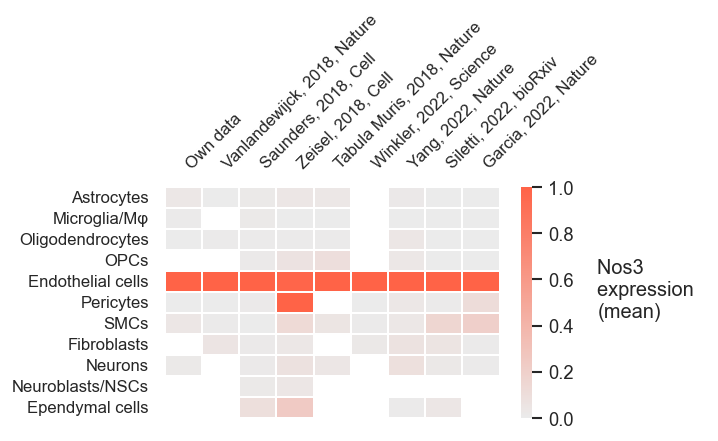

In [333]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [334]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [335]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [336]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [337]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

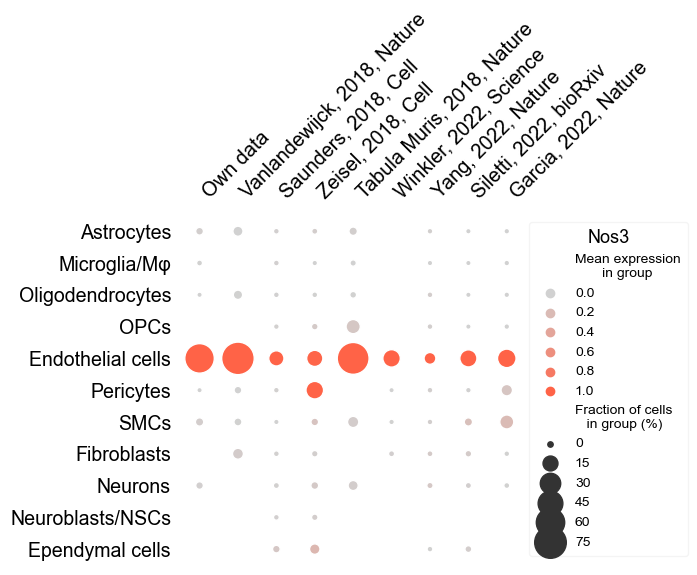

In [338]:
plt.show()

In [339]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [340]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [341]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230228_NOS3_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230302_NOS3_Garcia2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230310_Nos3_Vanlandewijck2018_incl_zonation.csv']

In [342]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [343]:
all.source.unique()

array(['Winkler2022', 'Yang2022', 'Garcia2022', 'Vanlandewijck2018'],
      dtype=object)

In [344]:
all.gene.unique()

array(['NOS3', 'Nos3'], dtype=object)

In [345]:
all.clusters2.unique().tolist()

['ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'Fibroblasts',
 'Fibromyocytes',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligos',
 'T cells',
 'Microglia',
 'aECs',
 'capECs',
 'vECs',
 'ECs_non_AV']

### Format

#### Remove celltypes

In [346]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [347]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [348]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [349]:
all = all.replace("ECs_Arterial","aECs")

In [350]:
all = all.replace("ECs_Capillary","capECs")

In [351]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [352]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Oligodendrocytes',
 'Microglia']

In [353]:
all = all.replace("Microglia","Microglia/Mφ")

In [354]:
all = all.replace("Macrophages","Microglia/Mφ")

In [355]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [356]:
all.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [357]:
all2 = all

#### Set order of axes

In [358]:
all2.clusters2.unique().tolist()

['aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Pericytes',
 'SMCs',
 'Astrocytes',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs',
 'Oligodendrocytes']

In [359]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [360]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [361]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [362]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [363]:
all2 = all2.replace("Heindl2022","Own data")

In [364]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [365]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [366]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [367]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [368]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [369]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [370]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [371]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [372]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [373]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


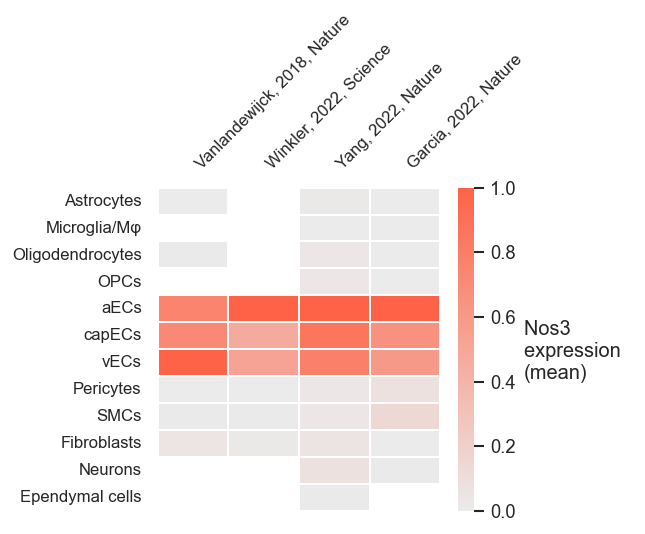

In [374]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [375]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [376]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [377]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [378]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

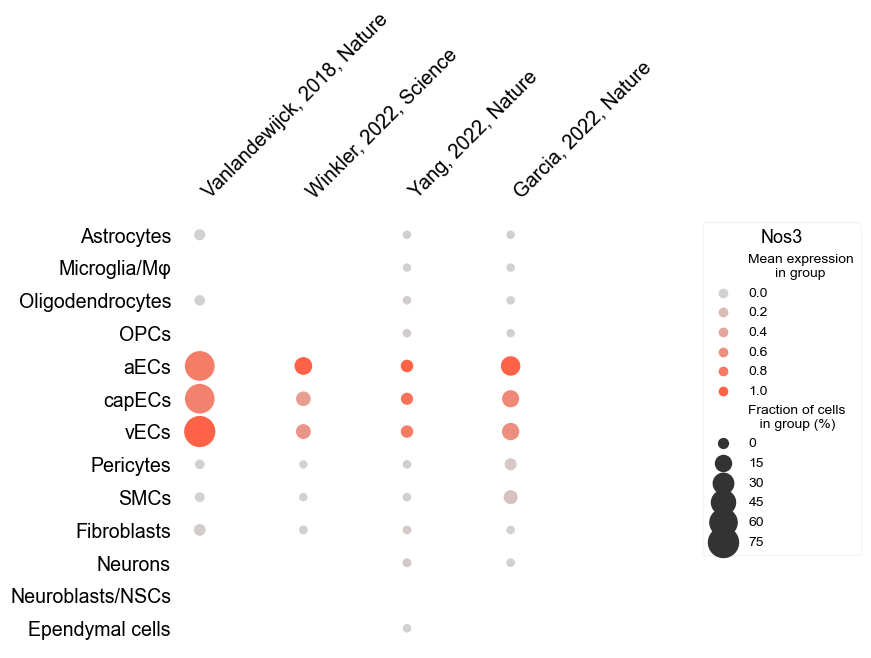

In [379]:
plt.show()

In [380]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [381]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Htra1

In [100]:
gene="Htra1"

## Load data

In [101]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "20230614*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Htra1_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Htra1_Vanlandewijck2018.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_HTRA1_Yang2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_HTRA1_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_HTRA1_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_HTRA1_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Ht

In [102]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [103]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Yang2022', 'Winkler2022',
       'Garcia2022', 'Siletti2022', 'Zeisel2018', 'TabulaMuris2018',
       'Saunders2018'], dtype=object)

In [104]:
all.gene.unique()

array(['Htra1', 'HTRA1'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [105]:
all.clusters.value_counts()

SMCs                               9
Astrocytes                         8
Oligos                             8
Pericytes                          8
Neurons                            7
Fibroblasts                        6
OPCs                               6
Microglia/Macrophages              5
Endothelial cells                  5
Ependymal cells                    4
ECs                                4
Unknown                            2
Immune_Other                       1
T cells                            1
Fibromyocytes                      1
Microglia                          1
Choroid plexus epithelial cells    1
Macrophages                        1
Olfactory ensheathing cells        1
Neuroblasts                        1
Leptomeningeal cells               1
Neurogenesis                       1
Name: clusters, dtype: int64

In [106]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,T cells,Unknown
source,,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,0,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
Yang2022,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0,0


In [107]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [108]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [109]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [110]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Microglia',
 'Macrophages',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

In [111]:
all = all.replace("Microglia","Microglia/Mφ")

In [112]:
all = all.replace("Macrophages","Microglia/Mφ")

In [113]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [114]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [115]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [116]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [117]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [118]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [119]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [120]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [121]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
57,Neuroblasts/NSCs,0.004708,0.015185,Htra1,Zeisel2018,Mouse,5466
76,Neuroblasts/NSCs,0.006584,0.025948,Htra1,Saunders2018,Mouse,4008


### Rename ECs

In [122]:
# rename ECs to Endothelial cells

In [123]:
all2 = all

In [124]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [125]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [126]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [127]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [128]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [129]:
all2 = all2.sort_values("clusters")

### Rename studies

In [130]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [131]:
all2 = all2.replace("Heindl2022","Own data")

In [132]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [133]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [134]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [135]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [136]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [137]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [138]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [139]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [140]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [141]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


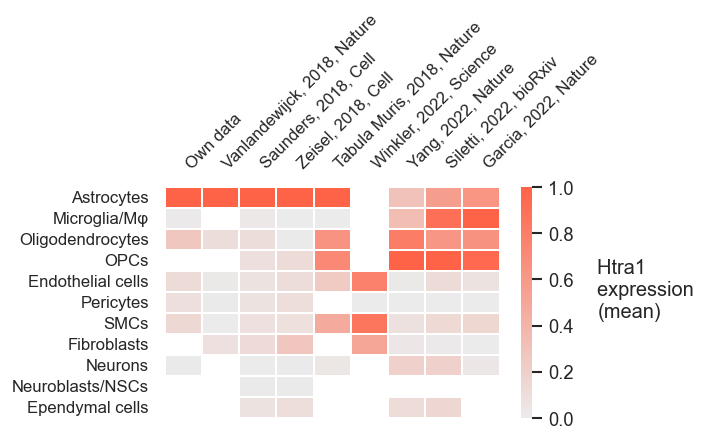

In [142]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [143]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [144]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [145]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [146]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

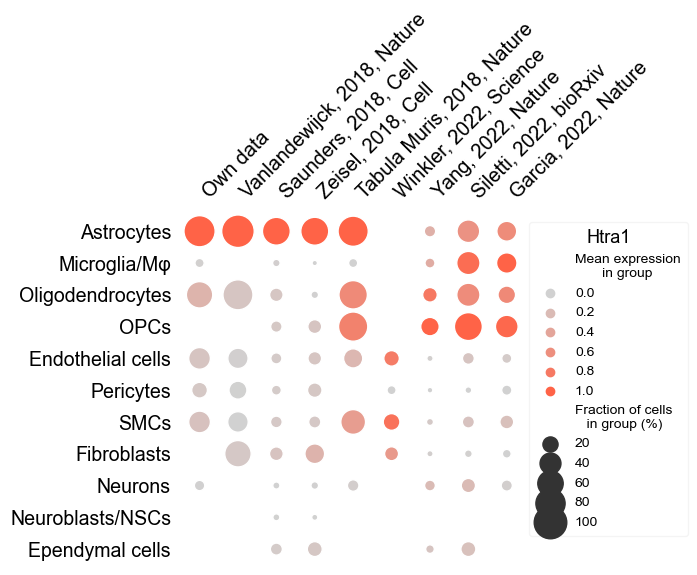

In [147]:
plt.show()

In [148]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [149]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [59]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_Htra1_Vanlandewijck2018_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Yang2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_HTRA1_Garcia2022_incl_zonation_normalized.csv']

In [60]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [61]:
all.source.unique()

array(['Vanlandewijck2018', 'Yang2022', 'Winkler2022', 'Garcia2022'],
      dtype=object)

In [62]:
all.gene.unique()

array(['Htra1', 'HTRA1'], dtype=object)

In [63]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'T cells',
 'Fibromyocytes',
 'Microglia',
 'aECs',
 'capECs',
 'vECs']

### Format

#### Remove celltypes

In [64]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [65]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [66]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [67]:
all = all.replace("ECs_Arterial","aECs")

In [68]:
all = all.replace("ECs_Capillary","capECs")

In [69]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [70]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Macrophages',
 'Neurons',
 'OPCs',
 'Microglia']

In [71]:
all = all.replace("Microglia","Microglia/Mφ")

In [72]:
all = all.replace("Macrophages","Microglia/Mφ")

In [73]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [74]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [75]:
all2 = all

#### Set order of axes

In [76]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Ependymal cells',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [77]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Yang2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Yang2022", "Garcia2022"])

In [78]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [79]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [80]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [81]:
all2 = all2.replace("Heindl2022","Own data")

In [82]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [83]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [84]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [85]:
all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [86]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [87]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [88]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [89]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [90]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [91]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


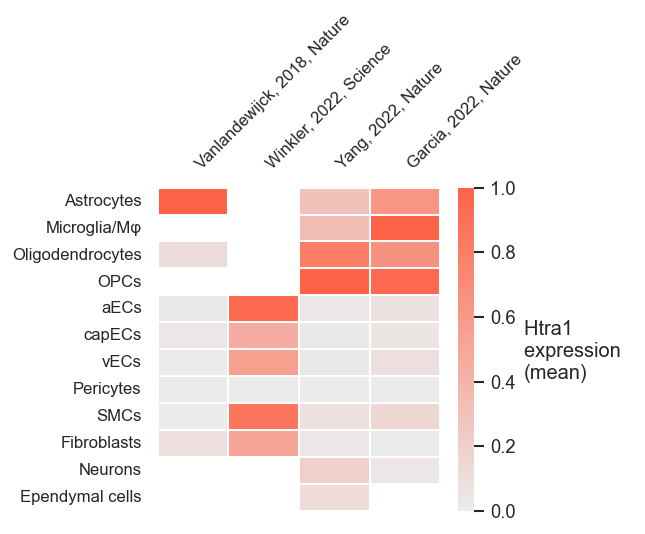

In [92]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [93]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [94]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [95]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [96]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

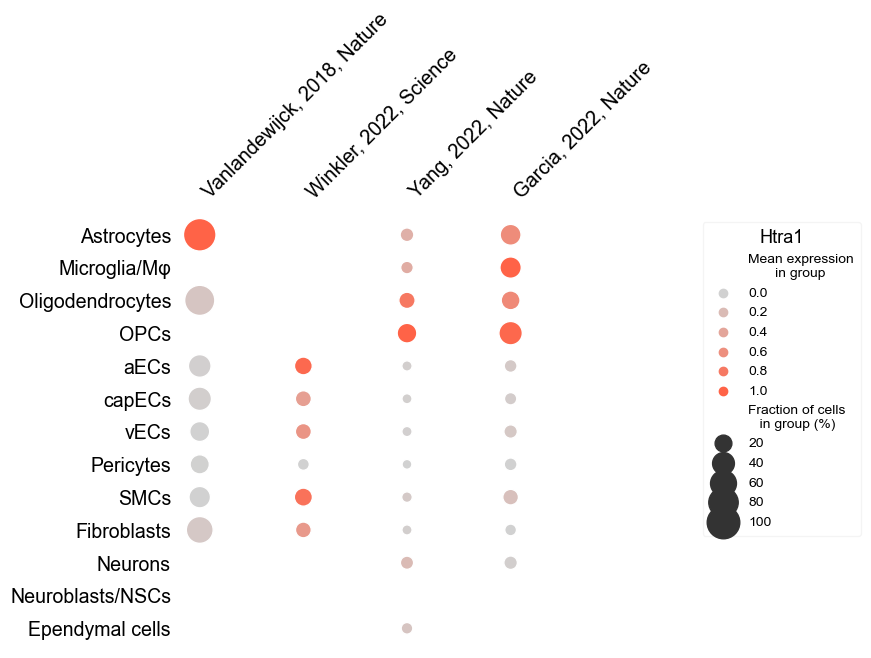

In [97]:
plt.show()

In [98]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [99]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Other genes: Egfl8

In [198]:
gene="Egfl8"

## Load data

In [199]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized' 
all_files = glob.glob(os.path.join(path , "20230614*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Egfl8_Heindl2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Egfl8_Vanlandewijck2018.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_EGFL8_Winkler2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_EGFL8_Siletti2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_EGFL8_Garcia2022_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_Egfl8_Zeisel2018_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\20230614_

In [200]:
# Yang2022 did not include Egfl8

In [201]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [202]:
all.source.unique()

array(['Heindl2022', 'Vanlandewijck2018', 'Winkler2022', 'Siletti2022',
       'Garcia2022', 'Zeisel2018', 'TabulaMuris2018', 'Saunders2018'],
      dtype=object)

In [203]:
all.gene.unique()

array(['Egfl8', 'EGFL8'], dtype=object)

## Format

### Remove celltypes

Remove celltypes which are only available in few studies

In [204]:
all.clusters.value_counts()

SMCs                               8
Astrocytes                         7
Oligos                             7
Pericytes                          7
Neurons                            6
OPCs                               5
Endothelial cells                  5
Fibroblasts                        5
Microglia/Macrophages              4
ECs                                3
Ependymal cells                    3
Unknown                            2
Fibromyocytes                      1
Choroid plexus epithelial cells    1
Macrophages                        1
Immune_Other                       1
Microglia                          1
Olfactory ensheathing cells        1
Neuroblasts                        1
Leptomeningeal cells               1
Neurogenesis                       1
Name: clusters, dtype: int64

In [205]:
pd.options.display.max_columns=50
pd.crosstab(all.source, all.clusters)

clusters,Astrocytes,Choroid plexus epithelial cells,ECs,Endothelial cells,Ependymal cells,Fibroblasts,Fibromyocytes,Immune_Other,Leptomeningeal cells,Macrophages,Microglia,Microglia/Macrophages,Neuroblasts,Neurogenesis,Neurons,OPCs,Olfactory ensheathing cells,Oligos,Pericytes,SMCs,Unknown
source,,,,,,,,,,,,,,,,,,,,,
Garcia2022,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0
Heindl2022,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,1,1
Saunders2018,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0
Siletti2022,1,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,0
TabulaMuris2018,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1
Vanlandewijck2018,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
Winkler2022,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
Zeisel2018,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,1,1,0


In [206]:
all = all[all.clusters != "Unknown"]
all = all[all.clusters != 'Immune_Other']
all = all[all.clusters != 'Olfactory ensheathing cells']
all = all[all.clusters != 'Fibromyocytes']
all = all[all.clusters != 'T cells']
all = all[all.clusters != 'NK/T cells']
all = all[all.clusters != 'Choroid plexus epithelial cells']
all = all[all.clusters != 'Neuroepithelial cells']
all = all[all.clusters != 'Olfactory ensheathing cells']

In [207]:
all = all[all.clusters != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters != 'Olfactory ensheathing glia']
all = all[all.clusters != 'Hypendymal cells']

### Rename Oligos

In [208]:
all = all.replace("Oligos","Oligodendrocytes")

### Match Microglia naming

In [209]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Macrophages',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'Macrophages',
 'OPCs',
 'Microglia',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

In [210]:
all = all.replace("Microglia","Microglia/Mφ")

In [211]:
all = all.replace("Macrophages","Microglia/Mφ")

In [212]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [213]:
all.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'ECs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts',
 'Leptomeningeal cells',
 'Neurogenesis']

### SMCs/Pericytes

In [214]:
all[all.clusters=="SMCs/Pericytes"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number


In [215]:
all = all.replace("SMCs/Pericytes","SMCs") # rather SMCs than pericytes, see TabulaMurisSenis2020 pp script

### Fibroblasts = VLMC

See Zeisel 2018 Cell

In [216]:
all = all.replace("Leptomeningeal cells","Fibroblasts")

In [217]:
all = all.replace("VLMCs","Fibroblasts")

### Group Neuroblasts/Neuronal stem cells

In [218]:
# Group Neurogenesis + Neuroblasts + Neuronal stem cells

In [219]:
all = all.replace("Neuroblasts","Neuroblasts/NSCs")
all = all.replace("Neuronal stem cells","Neuroblasts/NSCs")
all = all.replace("Neurogenesis","Neuroblasts/NSCs")
all = all.replace("Neural stem cells","Neuroblasts/NSCs")

In [220]:
all[all.clusters=="Neuroblasts/NSCs"]

,clusters,mean_expression,fraction_of_cells,gene,source,organism,cell_number
46,Neuroblasts/NSCs,0.000000,0.002012,Egfl8,Zeisel2018,Mouse,5466
65,Neuroblasts/NSCs,0.004378,0.002246,Egfl8,Saunders2018,Mouse,4008


### Rename ECs

In [221]:
# rename ECs to Endothelial cells

In [222]:
all2 = all

In [223]:
all2 = all2.replace("ECs","Endothelial cells")

### Set order of axes

In [224]:
all2.clusters.unique().tolist()

['Astrocytes',
 'Endothelial cells',
 'Microglia/Mφ',
 'Neurons',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Fibroblasts',
 'Ependymal cells',
 'OPCs',
 'Neuroblasts/NSCs']

In [225]:
#all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "TabulaMurisSenis2020", "Ximerakis2019","Zhao2020","Winkler2022", "Yang2022", "Siletti2022", "Garcia2022"])

In [226]:
all2.source = pd.Categorical(all2.source, categories= ["Heindl2022", "Vanlandewijck2018", "Saunders2018", "Zeisel2018", "TabulaMuris2018", "Winkler2022", "Siletti2022", "Garcia2022"])

In [227]:
all2.clusters = pd.Categorical(all2.clusters, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "Endothelial cells", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [228]:
all2 = all2.sort_values("clusters")

### Rename studies

In [229]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [230]:
all2 = all2.replace("Heindl2022","Own data")

In [231]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [232]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [233]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [234]:
#all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [235]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [236]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [237]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [238]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

## Heatmap

In [239]:
# Format table
all4=all2.set_index(['clusters','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters
all4=all4.reindex(list(all2.clusters.unique()))
all4=all4.drop("clusters",axis=1)
#all4.sort_values("clusters")
#all4

In [240]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


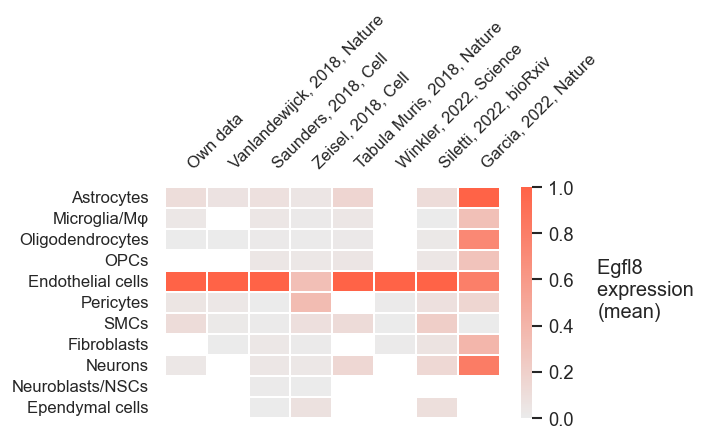

In [241]:
with rc_context({'figure.figsize': (4.5,2.5), 'figure.dpi': 120}):
    pl = sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None);
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.png', dpi=500, bbox_inches='tight')
    plt.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_Foxf2_by_celltype_heatmap.svg', dpi=500, bbox_inches='tight')
    plt.show()

## Dotplot

In [242]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [243]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [244]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [245]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(15, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.4,4.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(1,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

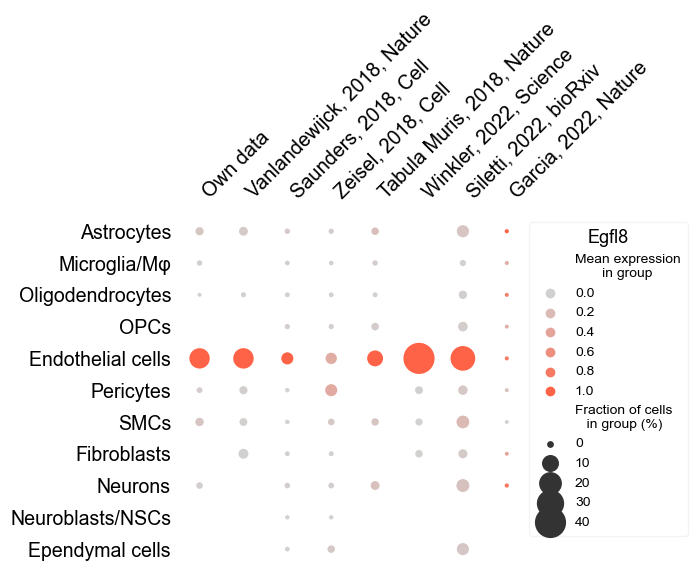

In [246]:
plt.show()

In [247]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.png', dpi=500)

In [248]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype.svg', dpi=500)

## Include AV zonation

### Load data

In [249]:
path = main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation' 
all_files = glob.glob(os.path.join(path , "2023*_"+gene+"_*.csv"))
all_files

['\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_Egfl8_Vanlandewijck2018_incl_zonation.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_EGFL8_Winkler2022_incl_zonation_normalized.csv',
 '\\\\isdsynnas.srv.med.uni-muenchen.de\\BD-Dichgans\\SF\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\20230614_EGFL8_Garcia2022_incl_zonation_normalized.csv']

In [250]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=";")
    li.append(df)

all = pd.concat(li, axis=0, ignore_index=True)

In [251]:
all.source.unique()

array(['Vanlandewijck2018', 'Winkler2022', 'Garcia2022'], dtype=object)

In [252]:
all.gene.unique()

array(['Egfl8', 'EGFL8'], dtype=object)

In [253]:
all.clusters2.unique().tolist()

['Astrocytes',
 'ECs_Arterial',
 'ECs_Capillary',
 'ECs_Venous',
 'ECs_non_AV',
 'Fibroblasts',
 'Oligos',
 'Pericytes',
 'SMCs',
 'Fibromyocytes',
 'Microglia',
 'Neurons',
 'OPCs',
 'aECs',
 'capECs',
 'vECs']

### Format

#### Remove celltypes

In [254]:
# remove celltypes which are only available in 1 group
all = all[all.clusters2 != "Unknown"]
all = all[all.clusters2 != 'Immune_Other']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'Fibromyocytes']
all = all[all.clusters2 != 'T cells']
all = all[all.clusters2 != 'NK/T cells']
all = all[all.clusters2 != 'Choroid plexus epithelial cells']
all = all[all.clusters2 != 'Neuroepithelial cells']
all = all[all.clusters2 != 'Olfactory ensheathing cells']
all = all[all.clusters2 != 'ECs_non_AV']
all = all[all.clusters2 != 'ECs_unclassified']

In [255]:
all = all[all.clusters2 != 'Hemoglobin-expressing vascular cells']
all = all[all.clusters2 != 'Olfactory ensheathing glia']
all = all[all.clusters2 != 'Hypendymal cells']

#### Rename Oligos

In [256]:
all = all.replace("Oligos","Oligodendrocytes")

#### Match AV naming

In [257]:
all = all.replace("ECs_Arterial","aECs")

In [258]:
all = all.replace("ECs_Capillary","capECs")

In [259]:
all = all.replace("ECs_Venous","vECs")

#### Match Microglia naming

In [260]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia',
 'Neurons',
 'OPCs']

In [261]:
all = all.replace("Microglia","Microglia/Mφ")

In [262]:
all = all.replace("Macrophages","Microglia/Mφ")

In [263]:
all = all.replace("Microglia/Macrophages","Microglia/Mφ")

In [264]:
all.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [265]:
all2 = all

#### Set order of axes

In [266]:
all2.clusters2.unique().tolist()

['Astrocytes',
 'aECs',
 'capECs',
 'vECs',
 'Fibroblasts',
 'Oligodendrocytes',
 'Pericytes',
 'SMCs',
 'Microglia/Mφ',
 'Neurons',
 'OPCs']

In [267]:
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Zhao2020","Winkler2022", "Garcia2022"])
all2.source = pd.Categorical(all2.source, categories= ["Vanlandewijck2018","Winkler2022", "Garcia2022"])

In [268]:
all2.clusters2 = pd.Categorical(all2.clusters2, categories= ["Astrocytes","Microglia/Mφ", "Oligodendrocytes", "OPCs", "aECs", "capECs", "vECs", "Pericytes", "SMCs", "Fibroblasts", "Neurons", "Neuroblasts/NSCs", "Ependymal cells"])

In [269]:
all2 = all2.sort_values("clusters2")

### Rename studies

In [270]:
all2 = all2.replace("Saunders2018","Saunders, 2018, Cell")

In [271]:
all2 = all2.replace("Heindl2022","Own data")

In [272]:
all2 = all2.replace("Zeisel2018","Zeisel, 2018, Cell")

In [273]:
all2 = all2.replace("TabulaMuris2018", "Tabula Muris, 2018, Nature")

In [274]:
all2 = all2.replace("Winkler2022", "Winkler, 2022, Science")

In [275]:
#all2 = all2.replace("Yang2022", "Yang, 2022, Nature")

In [276]:
all2 = all2.replace("Vanlandewijck2018", "Vanlandewijck, 2018, Nature")

In [277]:
all2 = all2.replace("Siletti2022", "Siletti, 2022, bioRxiv")

In [278]:
all2 = all2.replace("Garcia2022", "Garcia, 2022, Nature")

In [279]:
#all2 = all2.replace("Ximerakis2019", "Ximerakis, 2019, Nat Neurosci")
#all2 = all2.replace("TabulaMurisSenis2020", "Tabula Muris, 2020, Nature")
#all2 = all2.replace("Zhao2020", "Zhao, 2020, Nat Comm")

### Heatmap

In [280]:
# Format table
all4=all2.set_index(['clusters2','source'])['mean_expression'].unstack().reset_index() # unmelt
# change row order to represent groupings
all4.index = all4.clusters2
all4=all4.reindex(list(all2.clusters2.unique()))
all4=all4.drop("clusters2",axis=1)
#all4.sort_values("clusters")
#all4

In [281]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#ebebeb','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal = sns.color_palette("mycolormap", as_cmap=True)
#cpal

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\2694609101.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


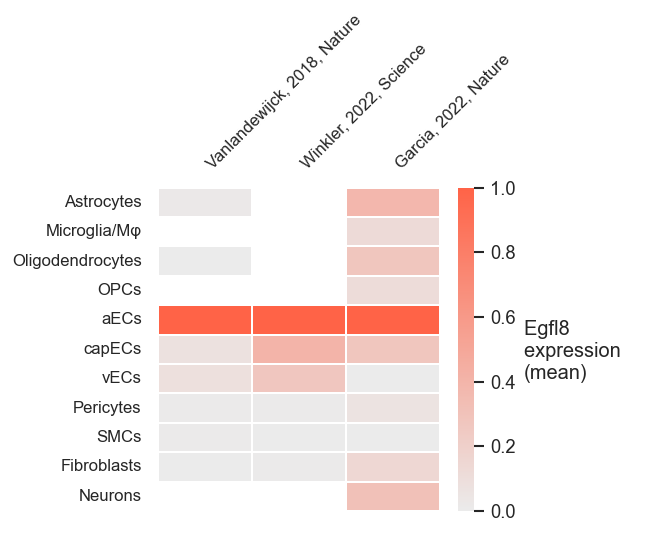

In [282]:
with rc_context({'figure.figsize': (3.8,3.5), 'figure.dpi': 120}):
    sns.heatmap(all4, cmap=cpal, vmin=0, vmax=1, linewidths=0.01).set(ylabel=None,xlabel=None)
    plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
    plt.xticks(rotation=45, ha = 'left')
    plt.legend(loc=(1.27,0.345), title=gene+' \nexpression \n(mean)', frameon=False)
    plt.show()

### Dotplot

In [283]:
# create color palette
my_cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ['#d1d1d1','tomato'])
plt.cm.register_cmap("mycolormap", my_cmap2)
cpal2 = sns.color_palette("mycolormap", as_cmap=True)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_14940\1534240740.py:3: UserWarning: Trying to register the cmap 'mycolormap' which already exists.
  plt.cm.register_cmap("mycolormap", my_cmap2)


In [284]:
all2.columns = ['clusters', 'Mean expression\n       in group', 'Fraction of cells\n   in group (%)', 'gene', 'source','organism', 'cell_number']

In [285]:
all2["Fraction of cells\n   in group (%)"] = all2["Fraction of cells\n   in group (%)"]*100

In [286]:
sns.set(style="white")
pl=sns.relplot(data=all2, x="source", y="clusters",
                hue='Mean expression\n       in group', size='Fraction of cells\n   in group (%)',
                #size_norm=(50, 500),
                palette=cpal2, 
                sizes=(50, 550), # tile size limits
                #marker="s", # round or squared
                linewidth=1,
                #legend=None,
                #aspect=0.9
              );
pl.set(ylabel=None,xlabel=None)
#plt.title("KO vs WT: Enriched gene sets", y=1.02, fontsize=16)
#plt.suptitle("Top "+str(topx_OR)+" DE genes of each brain region, sorted by OR", y=0.97, fontsize=13)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.xticks(rotation=45, ha = 'left')
pl.set_xticklabels(fontsize=14.4, family="arial", color="black")
#plt.xlabel(family='Arial')
pl.set_yticklabels(fontsize=14.1, family="arial", color="black")
pl.fig.set_size_inches(8.5,5.2)
#plt.legend(loc="upper right")
#sns.despine(bottom = False, left = False, right = False, top = False)
sns.despine(left=True, bottom=True);
#sns.despine(bottom=True, left=True, top=False)

# sns legend
leg = pl._legend
#leg.set_bbox_to_anchor([1.5,0.53])
leg.remove();

# mpl legend
legend = plt.legend(frameon=True, framealpha=0.2, borderpad=0.5, bbox_to_anchor=(2,1), title=gene, # handletextpad=0.7, 
           prop=mpl.font_manager.FontProperties(family='arial', size=10), labelcolor='black')
plt.setp(legend.get_title(), color='black', family='arial', size=13);

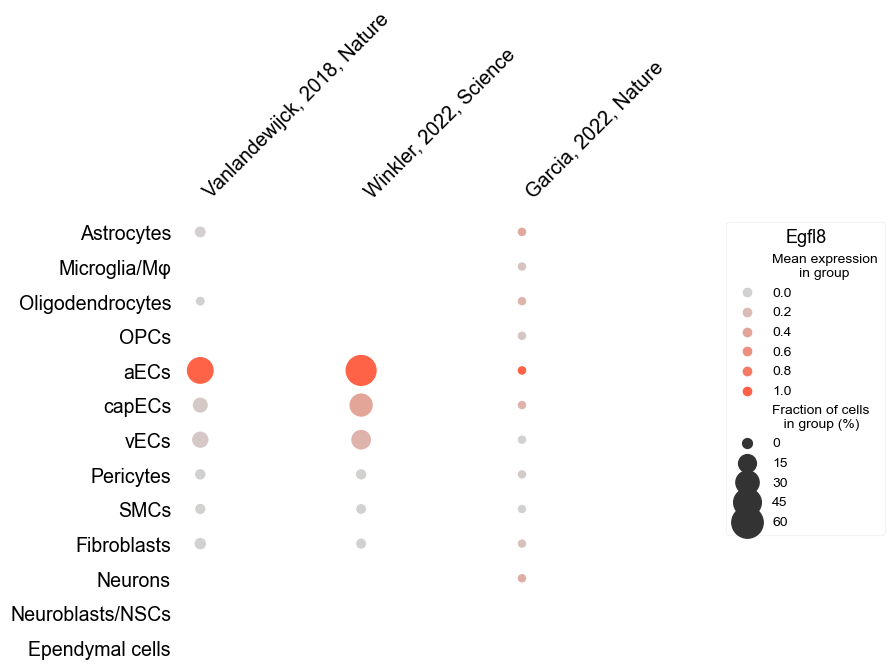

In [287]:
plt.show()

In [288]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.png', dpi=500)

In [289]:
pl.savefig(main_dir+'\\P6_Foxf2_per_celltype\\plots\\'+date.today().strftime("%Y%m%d")+'_'+gene+'_by_celltype_incl_AV_zonation.svg', dpi=500)

# Session Info

In [382]:
sc.logging.print_versions()

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asciitree                   NA
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
bottleneck                  1.3.5
cffi                        1.15.1
cloudpickle                 2.0.0
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dask                        2022.05.0
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
defusedxml                  0.7.1
entrypoints                 0.4
executing                   0.8.3
fasteners                   0.17.3
fsspec                      2022.3.0
h5py                        3.6.0
hypergeom_ufunc             NA
igraph                      0.9.10
ipykernel                   6.15.2
ipython_genutils            0.2.0
ipywidgets                  7.7.0
jedi                        0.18.1
jinja2 

# Outdated code

### Merge EC zonation

Outdated. Previously used to calculate weighted mean expression on ECs based on data from ECs split into zonation clusters. Now zonation clusters were merged already in anndata object, which is more accurate.

In [383]:
# merge EC zonation as weighted mean expression 
# in Yang2022 Winkler2022 Vanlandewijck2018

In [384]:
#Vanlandewijck2018 = all[all.source == "Vanlandewijck2018"]
#Vanlandewijck2018

In [385]:
# rename
#Vanlandewijck2018["clusters"] = Vanlandewijck2018.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Vanlandewijck2018

In [386]:
#Winkler2022 = all[all.source == "Winkler2022"]
#Winkler2022

In [387]:
# rename
#Winkler2022["clusters"] = Winkler2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
#Winkler2022

In [388]:
# Yang2022 = all[all.source == "Yang2022"]
# Yang2022

In [389]:
# Yang2022["clusters"] = Yang2022.loc[:,"clusters"].str.split("_",expand=True)[0].tolist()
# Yang2022

In [390]:
# remove original rows, then append new ones

In [391]:
# all.loc[Yang2022.index[0]:Yang2022.index[-1],:] = None
# all.loc[Winkler2022.index[0]:Winkler2022.index[-1],:] = None
# all.loc[Vanlandewijck2018.index[0]:Vanlandewijck2018.index[-1],:] = None
# all = all.dropna()

In [392]:
# compute new rows via weighted mean

In [393]:
# wm = lambda x: np.average(x, weights=Yang2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Yang2022_weighted_mean = Yang2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Yang2022_weighted_mean=Yang2022_weighted_mean.reset_index()[Yang2022.columns]
# Yang2022_weighted_mean

Contains correct weighted mean of mean_expression and fraction_of_cell (double checked)

In [394]:
# wm = lambda x: np.average(x, weights=Vanlandewijck2018.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Vanlandewijck2018_weighted_mean = Vanlandewijck2018.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Vanlandewijck2018_weighted_mean=Vanlandewijck2018_weighted_mean.reset_index()[Vanlandewijck2018.columns]
# Vanlandewijck2018_weighted_mean

In [395]:
# wm = lambda x: np.average(x, weights=Winkler2022.loc[x.index, "cell_number"])

# # Groupby and aggregate with namedAgg [1]:
# Winkler2022_weighted_mean = Winkler2022.groupby(["clusters", "gene", "source", "organism"]).agg(cell_number=("cell_number", "sum"),  
#                                                                  mean_expression=("mean_expression", wm),
#                                                                  fraction_of_cells=("fraction_of_cells", wm)
#                                                                 )
# Winkler2022_weighted_mean=Winkler2022_weighted_mean.reset_index()[Winkler2022.columns]
# Winkler2022_weighted_mean

In [396]:
# # append to all
# all2 = pd.concat([all, Winkler2022_weighted_mean, Yang2022_weighted_mean, Vanlandewijck2018_weighted_mean], axis=0)
# all2 = all2.reset_index().drop("index",axis=1)

### Complement missing celltypes 

In [397]:
# complement missing celltypes as NA rows

In [398]:
# all_celltypes = pd.Series(all2.clusters.unique())
# for s in all2.source.unique():
#     # find cell types missing per source
#     key_diff = set(all_celltypes).difference(all2[all2.source==s].clusters)
#     where_diff = all_celltypes.isin(key_diff)
#     missing_celltypes=all_celltypes[where_diff]
#     # append these to all2 as NA row
#     for m in missing_celltypes:
#         all2.loc[len(all2)] = [m,None,None,None,s,None,None]

# assert(len(all2) == len(all2.clusters.unique())*len(all2.source.unique()))

---
# Export HTML

In [ ]:
# Use nbconvert conda env
! cp combine_foxf2_results.ipynb HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb
! jupyter nbconvert HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb --to html_toc
! rm HTMLs/$(date '+%Y%m%d')_combine_foxf2_results.ipynb